In [324]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'darkgrid')
import sqlite3
import string
punctuation = string.punctuation

conn = sqlite3.connect("zippedData/im.db")

A key measure of success for any movie is the amount of profit it brings in for its studio. None of our datasets include profit, so we will begin by determining how profitable each movie in our dataset is.

In [325]:
# need a column that denotes profit, so start by importing financial data
movie_finances = pd.read_csv('zippedData/tn.movie_budgets.csv', index_col = 'id')
movie_finances.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [326]:
# check data types of seres in movie_finances
movie_finances.dtypes

release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

Right now, our financial data is stored as objects, which means we won't be able to perform mathematical operations on them. We'll need to fix that in order to proceed.

In [327]:
# financial information is currently stored as a string, need to convert to integer
# start by stripping '$' from each string
movie_finances['production_budget'] = movie_finances['production_budget'].apply(lambda x: x.replace('$', ""))
movie_finances['domestic_gross'] = movie_finances['domestic_gross'].apply(lambda x: x.replace('$', ""))
movie_finances['worldwide_gross'] = movie_finances['worldwide_gross'].apply(lambda x: x.replace('$', ""))

In [328]:
# then strip ',' from each string
movie_finances['production_budget'] = movie_finances['production_budget'].apply(lambda x: x.replace(',', ""))
movie_finances['domestic_gross'] = movie_finances['domestic_gross'].apply(lambda x: x.replace(',', ""))
movie_finances['worldwide_gross'] = movie_finances['worldwide_gross'].apply(lambda x: x.replace(',', ""))

In [329]:
# finally, change dtype to int
movie_finances['production_budget'] = movie_finances['production_budget'].astype(int)
movie_finances['domestic_gross'] = movie_finances['domestic_gross'].astype(int)
movie_finances['worldwide_gross'] = movie_finances['worldwide_gross'].astype(int)

In [330]:
# confirm dtypes have been updated
movie_finances.dtypes

release_date         object
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object

Now that we have cleaned the dataset, we can determine the domestic and worldwide profit for each movie. We will do so by subtracting the production budget from the domestic gross to determine domestic profit, and the from worldwide gross to determine worldwide profit. Further, we will subtract the domestic profit from the worldwide profit to determine the amount of profit earned outside of North America, which we will call "international profit".

In [331]:
# calculate domestic profit and save in a new column
movie_finances['domestic_profit'] = movie_finances['domestic_gross'] - movie_finances['production_budget']

# calculate worldwide profit and save in a new column
movie_finances['worldwide_profit'] = movie_finances['worldwide_gross'] - movie_finances['production_budget']

# calculate international profit and save in a new column
movie_finances['international_profit'] = movie_finances['worldwide_profit'] - movie_finances['domestic_profit']

movie_finances

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,international_profit
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,2015837654
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,804600000
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,107000000
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,944008095
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,696540365
...,...,...,...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000,0,0,-7000,-7000,0
79,"Apr 2, 1999",Following,6000,48482,240495,42482,234495,192013
80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,-3662,0


Let's also add some more information about each movie that we can use later in our analysis, such as genre and runtime.

In [502]:
# get movie characteristics from im.db
movie_basics = pd.read_sql("""
SELECT movie_id, primary_title, genres
  FROM movie_basics
""", conn)

movie_basics

,movie_id,primary_title,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy"
...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
146141,tt9916706,Dankyavar Danka,Comedy
146142,tt9916730,6 Gunn,None


In [503]:
# create a merged dataframe with information from both of these tables
movie_info = pd.merge(movie_finances, movie_basics, how = 'inner', left_on = 'movie', right_on = 'primary_title')
movie_info.drop('primary_title', axis = 1, inplace = True)

Now we have a comprehensive set of information on each movie that includes profit, genre, and release year. However, it's clear that the movie landscape has shifted dramatically in the last decade as digital native media companies like Netflix, legacy studios like Disney, and tech companies like Apple have begun creating and releasing original content. Let's narrow down our dataset to only include information on movies released since 2012 (when Netflix released its first Netflix Original, kicking off the modern era of the "Streaming Wars").

In [504]:
# extract the year from the release date and make it an integer
movie_info['release_year'] = movie_info['release_date'].str[-4:].astype(int)
movie_info

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,international_profit,movie_id,genres,release_year
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,2015837654,tt1775309,Horror,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,804600000,tt1298650,"Action,Adventure,Fantasy",2011
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,107000000,tt6565702,"Action,Adventure,Sci-Fi",2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,944008095,tt2395427,"Action,Adventure,Sci-Fi",2015
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,1369318718,tt4154756,"Action,Adventure,Sci-Fi",2018
...,...,...,...,...,...,...,...,...,...,...,...
3810,"Jul 6, 2001",Cure,10000,94596,94596,84596,84596,0,tt5936960,None,2001
3811,"Apr 1, 1996",Bang,10000,527,527,-9473,-9473,0,tt6616538,None,1996
3812,"Jan 13, 2012",Newlyweds,9000,4584,4584,-4416,-4416,0,tt1880418,"Comedy,Drama",2012
3813,"Dec 31, 2018",Red 11,7000,0,0,-7000,-7000,0,tt7837402,"Horror,Sci-Fi,Thriller",2018


In [505]:
movies_last_decade = movie_info.loc[movie_information['release_year'] >= 2012]
movies_last_decade.reset_index(inplace = True)
movies_last_decade

,index,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,international_profit,movie_id,genres,release_year
0,2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,107000000,tt6565702,"Action,Adventure,Sci-Fi",2019
1,3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,944008095,tt2395427,"Action,Adventure,Sci-Fi",2015
2,4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,1369318718,tt4154756,"Action,Adventure,Sci-Fi",2018
3,5,"Nov 17, 2017",Justice League,300000000,229024295,655945209,-70975705,355945209,426920914,tt0974015,"Action,Adventure,Fantasy",2017
4,6,"Nov 6, 2015",Spectre,300000000,200074175,879620923,-99925825,579620923,679546748,tt2379713,"Action,Adventure,Thriller",2015
...,...,...,...,...,...,...,...,...,...,...,...,...
2053,3805,"Apr 21, 2015",The Front Man,20000,0,0,-20000,-20000,0,tt2357398,"Biography,Comedy,Documentary",2015
2054,3807,"Dec 31, 2014",Stories of Our Lives,15000,0,0,-15000,-15000,0,tt3973612,Drama,2014
2055,3812,"Jan 13, 2012",Newlyweds,9000,4584,4584,-4416,-4416,0,tt1880418,"Comedy,Drama",2012
2056,3813,"Dec 31, 2018",Red 11,7000,0,0,-7000,-7000,0,tt7837402,"Horror,Sci-Fi,Thriller",2018


In [506]:
movies_last_decade.isna().sum()

index                    0
release_date             0
movie                    0
production_budget        0
domestic_gross           0
worldwide_gross          0
domestic_profit          0
worldwide_profit         0
international_profit     0
movie_id                 0
genres                  27
release_year             0
dtype: int64

Since there are only 27 null values in our dataset, representing just over 1% of our total records, let's drop rows with null values so we can operate from a clean starting point.

In [507]:
movies_last_decade.dropna(inplace = True)
movies_last_decade.isna().sum()

<ipython-input-507-59715f32e116>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_last_decade.dropna(inplace = True)


index                   0
release_date            0
movie                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
domestic_profit         0
worldwide_profit        0
international_profit    0
movie_id                0
genres                  0
release_year            0
dtype: int64

Further, while our dataset includes data on movies from 2020, that year was an outlier due to the sudden onset of the COVID-19 pandemic. It would not be representative of broader conditions in the movie industry to include data from that year since theaters were forced to close early in the year, so we will drop values from that year and limit our observations to movies from 2012-2019.

In [508]:
movies_last_decade.loc[movies_last_decade['release_year'] == 2020]

,index,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,international_profit,movie_id,genres,release_year
285,498,"Feb 21, 2020",Call of the Wild,82000000,0,0,-82000000,-82000000,0,tt7504726,"Adventure,Animation,Family",2020


There is only one film in our dataset from 2020, so we can remove that row individually:

In [509]:
movies_last_decade.drop(285, inplace = True)
movies_last_decade.reset_index()
movies_last_decade

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,index,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,international_profit,movie_id,genres,release_year
0,2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,107000000,tt6565702,"Action,Adventure,Sci-Fi",2019
1,3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,944008095,tt2395427,"Action,Adventure,Sci-Fi",2015
2,4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,1369318718,tt4154756,"Action,Adventure,Sci-Fi",2018
3,5,"Nov 17, 2017",Justice League,300000000,229024295,655945209,-70975705,355945209,426920914,tt0974015,"Action,Adventure,Fantasy",2017
4,6,"Nov 6, 2015",Spectre,300000000,200074175,879620923,-99925825,579620923,679546748,tt2379713,"Action,Adventure,Thriller",2015
...,...,...,...,...,...,...,...,...,...,...,...,...
2053,3805,"Apr 21, 2015",The Front Man,20000,0,0,-20000,-20000,0,tt2357398,"Biography,Comedy,Documentary",2015
2054,3807,"Dec 31, 2014",Stories of Our Lives,15000,0,0,-15000,-15000,0,tt3973612,Drama,2014
2055,3812,"Jan 13, 2012",Newlyweds,9000,4584,4584,-4416,-4416,0,tt1880418,"Comedy,Drama",2012
2056,3813,"Dec 31, 2018",Red 11,7000,0,0,-7000,-7000,0,tt7837402,"Horror,Sci-Fi,Thriller",2018


Finally, we need to ensure there are no duplicate rows in our dataset. Let's check for and remove any duplicates:

In [510]:
# check for duplicate movie names
movies_last_decade['movie'].value_counts()

Home                  24
Freedom               14
The Gift              13
Brothers              13
The Wall              10
                      ..
Dumb and Dumber To     1
Wreck-It Ralph         1
Endless Love           1
Inherent Vice          1
Wild Card              1
Name: movie, Length: 1414, dtype: int64

In [511]:
# drop rows based on duplicate movie names
movies_last_decade.drop_duplicates(subset = ['movie'], inplace = True)

#check if all movie name values are unique
movies_last_decade['movie'].value_counts()

<ipython-input-511-07203301f0b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_last_decade.drop_duplicates(subset = ['movie'], inplace = True)


Texas Chainsaw 3D              1
Christopher Robin              1
Paranoia                       1
Jack Reacher: Never Go Back    1
Ready Player One               1
                              ..
The Book Thief                 1
The Purge                      1
Arbitrage                      1
Prometheus                     1
Wild Card                      1
Name: movie, Length: 1414, dtype: int64

Excellent - now we have a dataset with just over 2,000 records and no missing values.

### Generating initial insights
Now that we have a clean dataset, we can examine the descriptive statistics for our dataset as a whole to learn a little bit about the distribution of the data.

In [512]:
movies_last_decade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 0 to 2057
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 1414 non-null   int64 
 1   release_date          1414 non-null   object
 2   movie                 1414 non-null   object
 3   production_budget     1414 non-null   int64 
 4   domestic_gross        1414 non-null   int64 
 5   worldwide_gross       1414 non-null   int64 
 6   domestic_profit       1414 non-null   int64 
 7   worldwide_profit      1414 non-null   int64 
 8   international_profit  1414 non-null   int64 
 9   movie_id              1414 non-null   object
 10  genres                1414 non-null   object
 11  release_year          1414 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 143.6+ KB


In [513]:
movies_last_decade.describe()

,index,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,international_profit,release_year
count,1414.000000,1.414000e+03,1.414000e+03,1.414000e+03,1.414000e+03,1.414000e+03,1.414000e+03,1414.000000
mean,1933.021924,3.867899e+07,4.851772e+07,1.234309e+08,9.838734e+06,8.475193e+07,7.491320e+07,2014.858557
std,1161.824981,5.417409e+07,8.392567e+07,2.298761e+08,5.836933e+07,1.898728e+08,1.527558e+08,1.974665
min,2.000000,1.400000e+03,0.000000e+00,0.000000e+00,-3.072376e+08,-2.002376e+08,0.000000e+00,2012.000000
25%,908.000000,4.500000e+06,1.356725e+05,1.156951e+06,-1.000000e+07,-1.605619e+06,1.590335e+05,2013.000000
50%,1940.500000,1.800000e+07,1.692842e+07,3.265423e+07,-7.571560e+05,1.129294e+07,1.175542e+07,2015.000000
75%,2951.750000,4.575000e+07,5.593153e+07,1.235774e+08,1.674527e+07,8.067984e+07,6.460250e+07,2016.000000
max,3814.000000,3.500000e+08,7.000596e+08,2.048134e+09,5.000596e+08,1.748134e+09,1.369319e+09,2019.000000


We can see that the data in our columns are spread over a wide range - from movies that cost just over $1,000 to make and earned no money at the box office to movies that cost hundreds of millions to bring to life and brought in hundreds of millions or even billions of dollars in profit. We can use a scatterplot to see how each of these variables are correlated:

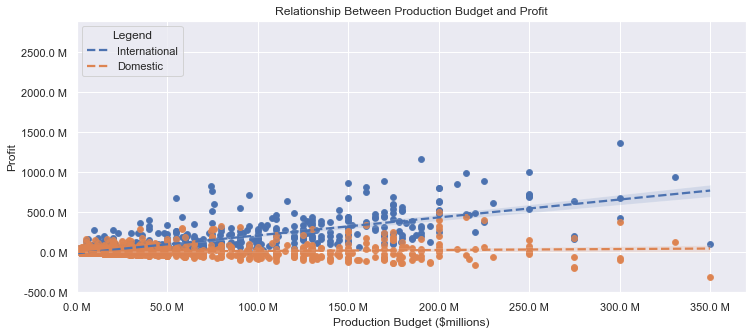

In [514]:
fig, ax = plt.subplots(figsize = (12, 5))

# create scatterplots for domestic and international profit vs. production budget
sns.scatterplot(data = movies_last_decade, x = 'production_budget', y = 'international_profit', legend = 'brief')
sns.scatterplot(data = movies_last_decade, x = 'production_budget', y = 'domestic_profit', legend = 'brief')

def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

# create regression plots to show linear relationships
sns.regplot(data = movies_last_decade, x = 'production_budget', y = 'international_profit', line_kws={'ls':'--'})
sns.regplot(data = movies_last_decade, x = 'production_budget', y = 'domestic_profit', line_kws={'ls':'--'})

# create labels, axes, and title for graph
ax.set_xlabel('Production Budget ($millions)')
ax.set_ylabel('Profit')
ax.set_title('Relationship Between Production Budget and Profit')
ax.set_xticks(range(0, 375000000, 10000000), minor = True)
ax.set_yticks(range(-500000000, 3000000000, 100000000), minor = True)
ax.xaxis.set_major_formatter(million_formatter)
ax.yaxis.set_major_formatter(million_formatter)
plt.legend(title = 'Legend', loc = 'upper left', labels = ['International', 'Domestic'])

plt.show();

It's clear from this graph that there is a positive relationship between the amount of money companies make internationally and the amount of money that is invested into their production, and that on average films earn more on the international market per dollar spent on production than they do domestically. This leads us to our first recommendation: **Microsoft should be sure to market its films internationally to maxmimize the value of its production dollar.**

### Maximizing the Value of Microsoft's Investment
Earning the highest possible overall profit is a key factor for Microsoft to consider in standing up its new enterprise, but the company does not have an infinite budget to do so. The Microsoft movie studio will have to ensure it is investing wisely to maximize the value of each dollar it invests. Consequently, our analysis will focus next on which movie genres perform the best in terms of profit dollar earned per production dollar invested, which we will call the profit ratio for the movie.

We will begin by creating new columns in our dataframe to calculate the domestic, international, and worldwide profit ratio for each movie in our dataset.

In [515]:
# create a copy of the DataFrame
profit_ratios = movies_last_decade.copy()

# create new columns
profit_ratios['domestic_profit_ratio'] = profit_ratios['domestic_profit'] / profit_ratios['production_budget']
profit_ratios['international_profit_ratio'] = profit_ratios['international_profit'] / profit_ratios['production_budget']
profit_ratios['worldwide_profit_ratio'] = profit_ratios['worldwide_profit'] / profit_ratios['production_budget']

# check that it worked
profit_ratios.head()

,index,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,international_profit,movie_id,genres,release_year,domestic_profit_ratio,international_profit_ratio,worldwide_profit_ratio
0,2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,107000000,tt6565702,"Action,Adventure,Sci-Fi",2019,-0.877822,0.305714,-0.572108
1,3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,944008095,tt2395427,"Action,Adventure,Sci-Fi",2015,0.388403,2.855439,3.243841
2,4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,1369318718,tt4154756,"Action,Adventure,Sci-Fi",2018,1.262718,4.564396,5.827114
3,5,"Nov 17, 2017",Justice League,300000000,229024295,655945209,-70975705,355945209,426920914,tt0974015,"Action,Adventure,Fantasy",2017,-0.236586,1.423070,1.186484
4,6,"Nov 6, 2015",Spectre,300000000,200074175,879620923,-99925825,579620923,679546748,tt2379713,"Action,Adventure,Thriller",2015,-0.333086,2.265156,1.932070


Now that we have this data, we need to figure out how to best characterize the genre of a movie. We have a 'genres' column already, but most movies appear to be a mix of several genres. In order to determine the best mix of genres for each market, let's start by separating this column into each component genre.

In [516]:
# convert each row in this column to a list to prepare for explosion
profit_ratios['genres'] = profit_ratios['genres'].apply(lambda x: x.split(','))

# explode the genres column to create a unique row for each genre of a movie
profit_ratios = profit_ratios.explode('genres')

Now that we've broken each record down by its component genres, we can group by those characteristics to determine which specific genre has the highest mean profit ratio in the domestic and international markets.

In [517]:
ratios_by_genre = profit_ratios.groupby('genres')['domestic_profit_ratio', 'international_profit_ratio'].mean()
ratios_by_genre

<ipython-input-517-a8c5d8307e9b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ratios_by_genre = profit_ratios.groupby('genres')['domestic_profit_ratio', 'international_profit_ratio'].mean()


,domestic_profit_ratio,international_profit_ratio
genres,,
Action,0.109368,1.586249
Adventure,0.163888,1.843413
Animation,0.348253,2.322038
Biography,0.648822,1.597638
Comedy,0.696922,1.532937
Crime,0.008589,0.910564
Documentary,0.339563,0.801723
Drama,0.470222,1.345237
Family,0.270102,1.159648


We can visualize this data with a bar chart to see where each genre's profit ratio is similar across markets, and where they differ.

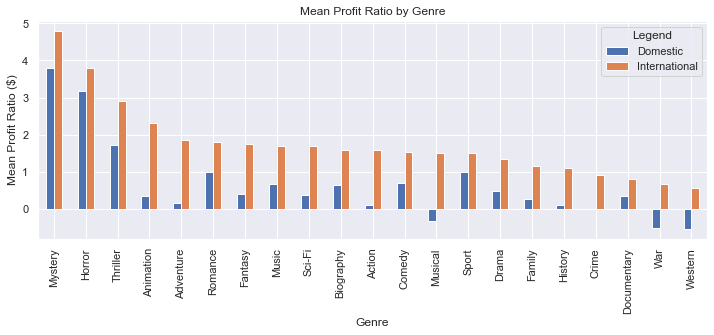

In [518]:
fig, ax = plt.subplots(figsize = (12, 4))

# create barplots for mean profit ratio of each genre
ratios_by_genre.sort_values( by = 'international_profit_ratio', ascending = False).plot(kind = 'bar', ax = ax)

# create labels, axes, and title for graph
ax.set_xlabel('Genre')
ax.set_ylabel('Mean Profit Ratio ($)')
ax.set_title('Mean Profit Ratio by Genre')
plt.xticks(rotation=90)
plt.legend(title = 'Legend', loc = 'upper right', labels = ['Domestic', 'International'])

plt.show();

Now let's compare this to overall mean profit by genre:

In [519]:
profits_by_genre = profit_ratios.groupby('genres')['domestic_profit', 'international_profit'].mean()
profits_by_genre

<ipython-input-519-0e46229d513a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  profits_by_genre = profit_ratios.groupby('genres')['domestic_profit', 'international_profit'].mean()


,domestic_profit,international_profit
genres,,
Action,8.180315e+06,1.538923e+08
Adventure,1.609946e+07,2.156347e+08
Animation,3.628121e+07,2.154517e+08
Biography,1.155289e+07,3.966289e+07
Comedy,1.718462e+07,6.862428e+07
Crime,2.438517e+06,3.935919e+07
Documentary,5.595438e+06,1.373840e+07
Drama,5.266795e+06,3.592622e+07
Family,6.419328e+06,1.004973e+08


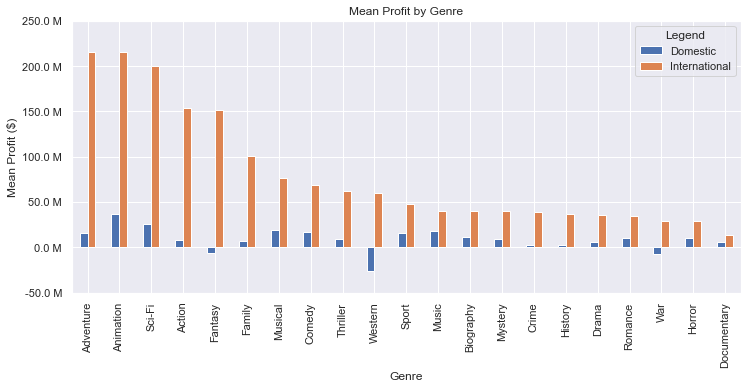

In [520]:
fig, ax = plt.subplots(figsize = (12, 5))

# create barplots for mean profit ratio of each genre
profits_by_genre.sort_values(by = 'international_profit', ascending = False).plot(kind = 'bar', ax = ax)

# create labels, axes, and title for graph
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

ax.set_xlabel('Genre')
ax.set_ylabel('Mean Profit ($)')
ax.set_title('Mean Profit by Genre')
ax.set_yticks(range(-50000000, 275000000, 100000000), minor = True)
ax.yaxis.set_major_formatter(million_formatter)
plt.xticks(rotation=90)
plt.legend(title = 'Legend', loc = 'upper right', labels = ['Domestic', 'International'])

plt.show();

Interesting - it looks like there is a substantial difference in which genres have the greatest profit ratios on average, vs. which genres earn the most profit on average. In order to make our second recommendation, let's rank each genre by its domestic and international mean profits and profit ratios, and average those rankings to reach a composite overall ranking that accounts for both value and overall profit potential.

In [521]:
# create the individual rankings
profits_by_genre['domestic_profit_rank'] = profits_by_genre['domestic_profit'].rank(ascending = False)
profits_by_genre['international_profit_rank'] = profits_by_genre['international_profit'].rank(ascending = False)
ratios_by_genre['domestic_profit_ratio_rank'] = ratios_by_genre['domestic_profit_ratio'].rank(ascending = False)
ratios_by_genre['international_profit_ratio_rank'] = ratios_by_genre['international_profit_ratio'].rank(ascending = False)

Finally, let's bring these rankings together and create our composite ranking. The genre with the lowest average ranking is the genre that provides the best mix of value per production dollar spent and highest average profit per movie release for that genre across both the domestic and international markets.

In [522]:
genre_rankings = pd.merge(profits_by_genre[['domestic_profit_rank', 'international_profit_rank']], ratios_by_genre[['domestic_profit_ratio_rank', 'international_profit_ratio_rank']], on = 'genres')
genre_rankings['average_ranking'] = (genre_rankings['domestic_profit_rank'] + genre_rankings['international_profit_rank'] + genre_rankings['domestic_profit_ratio_rank'] + genre_rankings['international_profit_ratio_rank']) / 4
genre_rankings.sort_values('average_ranking')

,domestic_profit_rank,international_profit_rank,domestic_profit_ratio_rank,international_profit_ratio_rank,average_ranking
genres,,,,,
Animation,1.0,2.0,12.0,4.0,4.75
Sci-Fi,2.0,3.0,11.0,9.0,6.25
Thriller,11.0,9.0,3.0,3.0,6.50
Adventure,6.0,1.0,15.0,5.0,6.75
Mystery,12.0,14.0,1.0,1.0,7.00
Comedy,5.0,8.0,6.0,12.0,7.75
Music,4.0,12.0,7.0,8.0,7.75
Horror,10.0,20.0,2.0,2.0,8.50
Sport,7.0,11.0,5.0,14.0,9.25


The genre characteristics that, on average, provide the best mix of value and profit maximization are at the top of this ranking. This leads to our second recommendation: **Microsoft should focus on making movies that include a mix of characteristics from the Animation, Sci-Fi, and/or Thriller genres in particular.** Films with Adventure, Mystery, Comedy, Music, Horror, Sport, and Romance characteristics round out the top 10.

### Avoiding "Clunkers"
Our first two recommendations have been about profit maximization - what market(s) to emphasize in rolling out films, and what genre(s) to focus on when making movies to achieve the best mix of high value and high profit ceiling. Our last recommendation will focus instead on loss minimization and risk mitigation by examining the characteristics of what we will call "clunkers" - movies that lost money on the worldwide market. Let's start by creating a subset of our data that only includes these films.

In [523]:
movies_last_decade.columns

Index(['index', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'domestic_profit', 'worldwide_profit',
       'international_profit', 'movie_id', 'genres', 'release_year'],
      dtype='object')

In [529]:
clunkers = movies_last_decade.loc[movies_last_decade['worldwide_profit'] <= 0]
clunkers.drop(['index', 'production_budget', 'domestic_gross', 'worldwide_gross', 'domestic_profit', 'international_profit'], axis = 1, inplace = True)
clunkers.reset_index(inplace = True)
clunkers

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,index,release_date,movie,worldwide_profit,movie_id,genres,release_year
0,0,"Jun 7, 2019",Dark Phoenix,-200237650,tt6565702,"Action,Adventure,Sci-Fi",2019
1,7,"Jul 2, 2013",The Lone Ranger,-14997885,tt1210819,"Action,Adventure,Western",2013
2,24,"Nov 21, 2018",Robin Hood,-14252559,tt0955308,"Action,Adventure,Drama",2018
3,81,"May 12, 2017",King Arthur: Legend of the Sword,-35369664,tt1972591,"Action,Adventure,Drama",2017
4,82,"Dec 25, 2013",47 Ronin,-23283185,tt1335975,"Action,Adventure,Drama",2013
...,...,...,...,...,...,...,...
548,2053,"Apr 21, 2015",The Front Man,-20000,tt2357398,"Biography,Comedy,Documentary",2015
549,2054,"Dec 31, 2014",Stories of Our Lives,-15000,tt3973612,Drama,2014
550,2055,"Jan 13, 2012",Newlyweds,-4416,tt1880418,"Comedy,Drama",2012
551,2056,"Dec 31, 2018",Red 11,-7000,tt7837402,"Horror,Sci-Fi,Thriller",2018


Let's add in information about directors for later analysis as well.

In [530]:
# get director info from im.db directors table
directors = pd.read_sql("""
SELECT *
  FROM directors
""", conn)

In [531]:
# get information from im.db persons table
names = pd.read_sql('''
SELECT * 
FROM persons
''', conn)

In [537]:
# merge director ids with names
director_names = pd.merge(directors, names , how = 'inner', on = 'person_id')
director_names.drop_duplicates(subset = ['movie_id'], inplace = True)
director_names

,movie_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0285252,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer"
1,tt0462036,nm1940585,Bill Haley,NaN,NaN,"director,writer,producer"
2,tt0835418,nm0151540,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer"
4,tt0859635,nm0151540,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer"
9,tt0878654,nm0089502,Albert Pyun,1954.0,NaN,"director,writer,producer"
...,...,...,...,...,...,...
291164,tt8998302,nm10121510,Daryl Boman,NaN,NaN,"producer,director,writer"
291165,tt8999892,nm10122247,C. Damon Adcock,NaN,NaN,None
291167,tt8999974,nm10122357,Daysi Burbano,NaN,NaN,"director,writer,cinematographer"
291168,tt9001390,nm6711477,Bernard Lessa,NaN,NaN,"director,writer,cinematographer"


Now we can merge our directors with our clunkers to create a complete record.

In [538]:
clunkers_directors = pd.merge(clunkers, director_names[['movie_id', 'primary_name']], on = 'movie_id', how = 'inner')
clunkers_directors

,index,release_date,movie,worldwide_profit,movie_id,genres,release_year,primary_name
0,0,"Jun 7, 2019",Dark Phoenix,-200237650,tt6565702,"Action,Adventure,Sci-Fi",2019,Simon Kinberg
1,7,"Jul 2, 2013",The Lone Ranger,-14997885,tt1210819,"Action,Adventure,Western",2013,Gore Verbinski
2,24,"Nov 21, 2018",Robin Hood,-14252559,tt0955308,"Action,Adventure,Drama",2018,Ridley Scott
3,81,"May 12, 2017",King Arthur: Legend of the Sword,-35369664,tt1972591,"Action,Adventure,Drama",2017,Guy Ritchie
4,82,"Dec 25, 2013",47 Ronin,-23283185,tt1335975,"Action,Adventure,Drama",2013,Carl Rinsch
...,...,...,...,...,...,...,...,...
547,2053,"Apr 21, 2015",The Front Man,-20000,tt2357398,"Biography,Comedy,Documentary",2015,Paul Devlin
548,2054,"Dec 31, 2014",Stories of Our Lives,-15000,tt3973612,Drama,2014,Jim Chuchu
549,2055,"Jan 13, 2012",Newlyweds,-4416,tt1880418,"Comedy,Drama",2012,Edward Burns
550,2056,"Dec 31, 2018",Red 11,-7000,tt7837402,"Horror,Sci-Fi,Thriller",2018,Robert Rodriguez


In [545]:
clunkers_directors.duplicated(subset = 'primary_name').sum()

26

### International Profit and Production Budget
Let's start by creating a subset of our movie_finances dataframe that only includes international profit and other characteristics of interest.

In [195]:
# create a subset of our original dataframe
international_finances = movies_last_decade.loc[:, ['release_date', 'movie', 'production_budget', 'international_profit', 'genres', 'release_year']]
international_finances.set_index('movie')

,release_date,production_budget,international_profit,genres,release_year
movie,,,,,
Dark Phoenix,"Jun 7, 2019",350000000,107000000,"Action,Adventure,Sci-Fi",2019
Avengers: Age of Ultron,"May 1, 2015",330600000,944008095,"Action,Adventure,Sci-Fi",2015
Avengers: Infinity War,"Apr 27, 2018",300000000,1369318718,"Action,Adventure,Sci-Fi",2018
Justice League,"Nov 17, 2017",300000000,426920914,"Action,Adventure,Fantasy",2017
Spectre,"Nov 6, 2015",300000000,679546748,"Action,Adventure,Thriller",2015
...,...,...,...,...,...
The Front Man,"Apr 21, 2015",20000,0,"Biography,Comedy,Documentary",2015
Stories of Our Lives,"Dec 31, 2014",15000,0,Drama,2014
Newlyweds,"Jan 13, 2012",9000,0,"Comedy,Drama",2012


Let's take a look at the distribution of profits for this dataset.

In [214]:
international_finances['international_profit'].median()

11755416.5

''

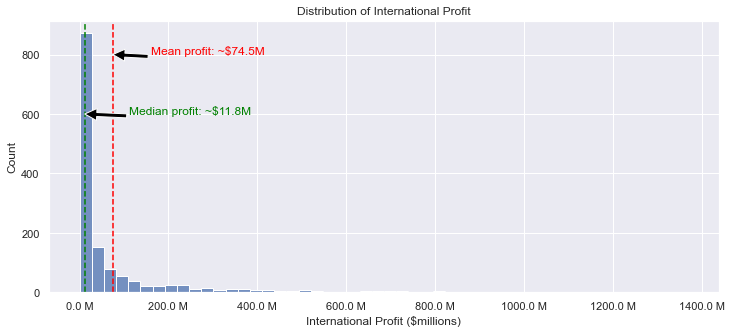

In [265]:
# create our histogram
fig, ax = plt.subplots(figsize = (12, 5))
sns.histplot(data = international_finances, x = 'international_profit', bins = 50)
ax.set_xlabel('International Profit ($millions)')
ax.set_title('Distribution of International Profit')
ax.xaxis.set_major_formatter(million_formatter)

#find mean and median for dataset and add them to plot with an annotation
plt.axvline(international_finances['international_profit'].mean(), color = 'red', ls = '--')
plt.axvline(international_finances['international_profit'].median(), color = 'green', ls = '--')
ax.annotate(text = 'Mean profit: ~$74.5M', xytext = (international_finances['international_profit'].mean() + 85000000, 800), \
            xy = (international_finances['international_profit'].mean(), 800), c = 'red', arrowprops = {'facecolor': 'black'})
ax.annotate(text = 'Median profit: ~$11.8M', xytext = (international_finances['international_profit'].median() + 100000000, 600), \
            xy = (international_finances['international_profit'].median(), 600), c = 'green', arrowprops = {'facecolor': 'black'})
;

The heavy left skew of this majority of the movies in our dataset earn between 0 dollars and 25 million dollars in profit. However, there are a That means that it's likely that a few movies that earned a disproportionately high share of profits. What are those movies?

In [207]:
international_finances.sort_values('international_profit', ascending = False).head(10)

,release_date,movie,production_budget,international_profit,genres,release_year
2,"Apr 27, 2018",Avengers: Infinity War,300000000,1369318718,"Action,Adventure,Sci-Fi",2018
42,"Apr 3, 2015",Furious 7,190000000,1165715774,"Action,Crime,Thriller",2015
14,"Apr 14, 2017",The Fate of the Furious,250000000,1009081502,"Action,Crime,Thriller",2017
21,"Jun 12, 2015",Jurassic World,215000000,996584239,"Action,Adventure,Sci-Fi",2015
1,"May 1, 2015",Avengers: Age of Ultron,330600000,944008095,"Action,Adventure,Sci-Fi",2015
16,"May 4, 2012",The Avengers,225000000,894656350,"Action,Adventure,Sci-Fi",2012
83,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,888053039,"Action,Adventure,Sci-Fi",2018
112,"Nov 22, 2013",Frozen,150000000,871731901,"Adventure,Drama,Sport",2013
23,"Jun 27, 2014",Transformers: Age of Extinction,210000000,858600000,"Action,Adventure,Sci-Fi",2014
318,"Jul 10, 2015",Minions,74000000,824290403,"Adventure,Animation,Comedy",2015


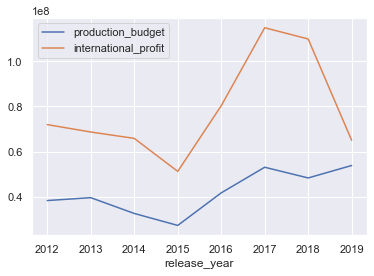

In [206]:
international_finances.groupby('release_year').mean().plot();

### Domestic Profit and Production Budget
As before, let's begin by creating a subset that only includes information on domestic profit and other variables of interest.

In [114]:
domestic_finances = movies_last_decade.loc[:, ['release_date', 'movie', 'production_budget', 'domestic_profit', 'genres', 'release_year']].reset_index()
domestic_finances.head()

,index,release_date,movie,production_budget,domestic_profit,genres,release_year
0,0,"Jun 7, 2019",Dark Phoenix,350000000,-307237650,"Action,Adventure,Sci-Fi",2019
1,1,"May 1, 2015",Avengers: Age of Ultron,330600000,128405868,"Action,Adventure,Sci-Fi",2015
2,2,"Apr 27, 2018",Avengers: Infinity War,300000000,378815482,"Action,Adventure,Sci-Fi",2018
3,3,"Nov 17, 2017",Justice League,300000000,-70975705,"Action,Adventure,Fantasy",2017
4,4,"Nov 6, 2015",Spectre,300000000,-99925825,"Action,Adventure,Thriller",2015


### What movie rating should Microsoft aim for?
In addition to identifying ___ and ___, the rating a movie receives 

In [32]:
# get writer info from im.db writers table
writers = pd.read_sql("""
SELECT *
  FROM writers
  
""", conn)

In [33]:
# get director info from im.db directors table
directors = pd.read_sql("""
SELECT *
  FROM directors
""", conn)

In [34]:
# get information from im.db persons table
names = pd.read_sql('''
SELECT * 
FROM persons
''', conn)

In [35]:
# print column names to identify information to merge on
print(directors.columns)
print(names.columns)
print(writers.columns)

Index(['movie_id', 'person_id'], dtype='object')
Index(['person_id', 'primary_name', 'birth_year', 'death_year',
       'primary_profession'],
      dtype='object')
Index(['movie_id', 'person_id'], dtype='object')


In [36]:
# merge directors and names to obtain director names as "primary_name"
director_names = pd.merge(directors, names , how = 'inner', on = 'person_id')
director_names

,movie_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0285252,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer"
1,tt0462036,nm1940585,Bill Haley,NaN,NaN,"director,writer,producer"
2,tt0835418,nm0151540,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer"
3,tt0835418,nm0151540,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer"
4,tt0859635,nm0151540,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer"
...,...,...,...,...,...,...
291166,tt8999892,nm10122247,C. Damon Adcock,NaN,NaN,None
291167,tt8999974,nm10122357,Daysi Burbano,NaN,NaN,"director,writer,cinematographer"
291168,tt9001390,nm6711477,Bernard Lessa,NaN,NaN,"director,writer,cinematographer"
291169,tt9001494,nm10123242,Tate Nova,NaN,NaN,"director,producer"


In [37]:
# merge writers and names to obtain writer names as "primary_name"
writer_names = pd.merge(writers, names , how = 'inner', on = 'person_id')
writer_names

,movie_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0285252,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer"
1,tt0438973,nm0175726,Steve Conrad,1968.0,NaN,"writer,producer,director"
2,tt2358925,nm0175726,Steve Conrad,1968.0,NaN,"writer,producer,director"
3,tt2543472,nm0175726,Steve Conrad,1968.0,NaN,"writer,producer,director"
4,tt0359950,nm0175726,Steve Conrad,1968.0,NaN,"writer,producer,director"
...,...,...,...,...,...,...
255866,tt8999892,nm10122247,C. Damon Adcock,NaN,NaN,None
255867,tt8999892,nm10122246,Bradley T. Castle,NaN,NaN,"actor,writer,producer"
255868,tt8999974,nm10122357,Daysi Burbano,NaN,NaN,"director,writer,cinematographer"
255869,tt9001390,nm6711477,Bernard Lessa,NaN,NaN,"director,writer,cinematographer"


In [38]:
# create a merged dataframe with writers and directors for each movie
directors_writers = pd.merge(director_names, writer_names, how = 'inner', on = 'movie_id').drop_duplicates().reset_index()

In [39]:
# drop extraneous columns
directors_writers.drop(['birth_year_x', 'death_year_x', 'primary_profession_x', 
                       'birth_year_y', 'death_year_y', 'primary_profession_y'],
                      axis = 1, inplace = True)

In [40]:
# rename columns to be clearer
directors_writers.rename(columns = {'person_id_x': 'director_id',
                                   'primary_name_x': 'director_name',
                                   'person_id_y': 'writer_id',
                                   'primary_name_y': 'writer_name'},
                        inplace = True)
directors_writers

,index,movie_id,director_id,director_name,writer_id,writer_name
0,0,tt0285252,nm0899854,Tony Vitale,nm0899854,Tony Vitale
1,1,tt0462036,nm1940585,Bill Haley,nm1940585,Bill Haley
2,2,tt0835418,nm0151540,Jay Chandrasekhar,nm0310087,Peter Gaulke
3,3,tt0835418,nm0151540,Jay Chandrasekhar,nm0841532,Gerry Swallow
4,6,tt0859635,nm0151540,Jay Chandrasekhar,nm0151540,Jay Chandrasekhar
...,...,...,...,...,...,...
254148,48154512,tt8998302,nm10121510,Daryl Boman,nm10121510,Daryl Boman
254149,48154513,tt8999892,nm10122247,C. Damon Adcock,nm10122247,C. Damon Adcock
254150,48154514,tt8999892,nm10122247,C. Damon Adcock,nm10122246,Bradley T. Castle
254151,48154517,tt8999974,nm10122357,Daysi Burbano,nm10122357,Daysi Burbano


In [41]:
# get information on movie ratings from file
movie_ratings = pd.read_table('zippedData/rt.movie_info.tsv', encoding = 'latin1')
movie_ratings

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [42]:
# common columns across both dataframes are director and writer
# will need to create a column that combines those names to merge the dataframes

directors_writers['director_writer'] = directors_writers['director_name'] + ", " + directors_writers['writer_name']
movie_ratings['director_writer'] = movie_ratings['director'] + ", " + movie_ratings['writer']

In [43]:
movie_ratings

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,director_writer
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,"William Friedkin, Ernest Tidyman"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,"David Cronenberg, David Cronenberg|Don DeLillo"
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,"Allison Anders, Allison Anders"
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,"Barry Levinson, Paul Attanasio|Michael Crichton"
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,"Rodney Bennett, Giles Cooper"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema,NaN
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage,"Steve Barron, Terry Turner|Tom Davis|Dan Aykro..."
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN,"David Mickey Evans, David Mickey Evans|Robert ..."


In [44]:
# merge dataframes
movies = pd.merge(directors_writers, movie_ratings, how = 'inner', on = 'director_writer').drop_duplicates().reset_index()
movies

,level_0,index,movie_id,director_id,director_name,writer_id,writer_name,director_writer,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,0,290,tt1125929,nm0000431,Taylor Hackford,nm0414893,Mark Jacobson,"Taylor Hackford, Mark Jacobson",14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
1,1,33264,tt2693702,nm0000419,Jean-Luc Godard,nm0000419,Jean-Luc Godard,"Jean-Luc Godard, Jean-Luc Godard",691,Director Jean-Luc Godard tries to remain objec...,NR,Art House and International|Drama,Jean-Luc Godard,Jean-Luc Godard,"Sep 20, 1962","Aug 11, 1998",NaN,NaN,85 minutes,NaN
2,2,40132965,tt2400275,nm0000419,Jean-Luc Godard,nm0000419,Jean-Luc Godard,"Jean-Luc Godard, Jean-Luc Godard",691,Director Jean-Luc Godard tries to remain objec...,NR,Art House and International|Drama,Jean-Luc Godard,Jean-Luc Godard,"Sep 20, 1962","Aug 11, 1998",NaN,NaN,85 minutes,NaN
3,3,40132966,tt1438535,nm0000419,Jean-Luc Godard,nm0000419,Jean-Luc Godard,"Jean-Luc Godard, Jean-Luc Godard",691,Director Jean-Luc Godard tries to remain objec...,NR,Art House and International|Drama,Jean-Luc Godard,Jean-Luc Godard,"Sep 20, 1962","Aug 11, 1998",NaN,NaN,85 minutes,NaN
4,4,40133087,tt5749596,nm0000419,Jean-Luc Godard,nm0000419,Jean-Luc Godard,"Jean-Luc Godard, Jean-Luc Godard",691,Director Jean-Luc Godard tries to remain objec...,NR,Art House and International|Drama,Jean-Luc Godard,Jean-Luc Godard,"Sep 20, 1962","Aug 11, 1998",NaN,NaN,85 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,48113936,tt5536610,nm0420982,Tamara Jenkins,nm0420982,Tamara Jenkins,"Tamara Jenkins, Tamara Jenkins",528,The last thing the two Savage siblings ever wa...,R,Comedy|Drama,Tamara Jenkins,Tamara Jenkins,"Nov 28, 2007","Apr 22, 2008",$,"6,426,953",114 minutes,Fox Searchlight Pictures
496,496,48122334,tt5873216,nm4354445,Anahita Ghazvinizadeh,nm4354445,Anahita Ghazvinizadeh,"Anahita Ghazvinizadeh, Anahita Ghazvinizadeh",1714,"Through the prism of J, notions of in-between-...",NR,Drama,Anahita Ghazvinizadeh,Anahita Ghazvinizadeh,NaN,NaN,NaN,NaN,80 minutes,NaN
497,497,48150588,tt0376479,nm0000191,Ewan McGregor,nm0738908,John Romano,"Ewan McGregor, John Romano",1236,"AMERICAN PASTORAL follows Seymour ""Swede"" Levo...",R,Drama,Ewan McGregor,John Romano,"Oct 21, 2016","Feb 7, 2017",$,"541,457",126 minutes,Lakeshore Entertainment
498,498,48151041,tt1720616,nm0922724,Jennifer Westfeldt,nm0922724,Jennifer Westfeldt,"Jennifer Westfeldt, Jennifer Westfeldt",304,Friends with Kids is a daring and poignant ens...,R,Comedy|Drama,Jennifer Westfeldt,Jennifer Westfeldt,"Mar 9, 2012","Jul 17, 2012",$,"5,600,000",107 minutes,Roadside Attractions


In [45]:
movies['rating'].value_counts()

R        205
NR       141
PG-13     78
PG        69
G          6
NC17       1
Name: rating, dtype: int64

### Further Questions for Exploration
While this analysis allowed us to generate several actionable recommendations, we would be able to further tailor our recommendations by taking the following steps:
- ;lakjsdf